# Fuel Economy Analysis for Years 2008 and 2018

**Fuel Economy in Automobiles:**<br>
The fuel economy of an automobile is the fuel efficiency relationship between the distance traveled and the amount of fuel consumed by the vehicle. Consumption can be expressed in terms of volume of fuel to travel a distance, or the distance travelled per unit volume of fuel consumed.

Info on datasets and key words are available in files ```Data Description.txt``` and ```Green Vehicle Guide Documentation.pdf``` at ```Datasets/Info```.

In [1]:
import pandas as pd
import numpy as np


data08_path = '../../Datasets/data08.csv'
data18_path = '../../Datasets/data18.csv'

df_08 = pd.read_csv(data08_path)
df_18 = pd.read_csv(data18_path)

In [2]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [3]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


**Unify and improve readablity of column names**

In [4]:
df_08.columns = df_08.columns.str.replace(' ','_').str.lower().str.strip()
#or using lambda:
#df_08.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

df_18.columns = df_18.columns.str.replace(' ','_').str.lower().str.strip()

## Assessing Data
**Explore these datasets to answer the questions below about the characteristics of the data:**<br>
number of samples in each dataset<br>
number of columns in each dataset<br>
duplicate rows in each dataset<br>
datatypes of columns<br>
features with missing values<br>
number of non-null unique values for features in each dataset<br>
what those unique values are and counts for each<br>


**Number of samples in each dataset**

In [5]:
record_count_08 = df_08.shape[0]
record_count_18 = df_18.shape[0]
print("There are {} records in 2008 datase".format(record_count_08))
print("There are {} records in 2018 datase".format(record_count_18))

There are 2404 records in 2008 datase
There are 1611 records in 2018 datase


**Number of columns in each dataset**

In [6]:
column_count_08 = df_08.shape[1]
column_count_18 = df_18.shape[1]
print("There are {} columns in 2008 datase".format(column_count_08))
print("There are {} columns in 2018 datase".format(column_count_18))

There are 18 columns in 2008 datase
There are 18 columns in 2018 datase


**Duplicate rows in each dataset**

In [7]:
duplicate_records_count_08 = df_08.duplicated().sum()
duplicate_records_index_08 = df_08[df_08.duplicated()].index
print("There are {} duplicate records in 2008 dataset which can be found at the following row numbers:\n{}\n".format(duplicate_records_count_08, list(duplicate_records_index_08)))
duplicate_records_count_18 = df_18.duplicated().sum()
duplicate_records_index_18 = df_18[df_18.duplicated()].index
print("There are {} duplicate records in 2018 dataset".format(duplicate_records_count_18))

There are 25 duplicate records in 2008 dataset which can be found at the following row numbers:
[752, 754, 769, 771, 773, 775, 794, 797, 800, 958, 960, 1000, 1001, 1006, 1007, 1015, 1019, 1021, 1023, 1026, 1027, 1030, 1033, 1034, 1037]

There are 0 duplicate records in 2018 dataset


**Datatypes of columns**

In [8]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 2404 non-null   object 
 1   displ                 2404 non-null   float64
 2   cyl                   2205 non-null   object 
 3   trans                 2205 non-null   object 
 4   drive                 2311 non-null   object 
 5   fuel                  2404 non-null   object 
 6   sales_area            2404 non-null   object 
 7   stnd                  2404 non-null   object 
 8   underhood_id          2404 non-null   object 
 9   veh_class             2404 non-null   object 
 10  air_pollution_score   2404 non-null   object 
 11  fe_calc_appr          2205 non-null   object 
 12  city_mpg              2205 non-null   object 
 13  hwy_mpg               2205 non-null   object 
 14  cmb_mpg               2205 non-null   object 
 15  unadj_cmb_mpg        

In [9]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1611 non-null   object 
 1   displ                 1609 non-null   float64
 2   cyl                   1609 non-null   float64
 3   trans                 1611 non-null   object 
 4   drive                 1611 non-null   object 
 5   fuel                  1611 non-null   object 
 6   cert_region           1611 non-null   object 
 7   stnd                  1611 non-null   object 
 8   stnd_description      1611 non-null   object 
 9   underhood_id          1611 non-null   object 
 10  veh_class             1611 non-null   object 
 11  air_pollution_score   1611 non-null   int64  
 12  city_mpg              1611 non-null   object 
 13  hwy_mpg               1611 non-null   object 
 14  cmb_mpg               1611 non-null   object 
 15  greenhouse_gas_score 

**Features with missing values**

In [10]:
features_with_missing_values_08 = list(df_08.columns[df_08.isna().any()])
features_with_missing_values_18 = list(df_18.columns[df_18.isna().any()])
print("In 2008 dataset the are missing values in columns below:\n{}\n".format(features_with_missing_values_08))
print("In 2018 dataset the are missing values in columns below:\n{}".format(features_with_missing_values_18))

In 2008 dataset the are missing values in columns below:
['cyl', 'trans', 'drive', 'fe_calc_appr', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'unadj_cmb_mpg', 'greenhouse_gas_score']

In 2018 dataset the are missing values in columns below:
['displ', 'cyl']


**Number of non-null unique values for features in each dataset**

In [11]:
df_08.nunique()

model                   436
displ                    47
cyl                       8
trans                    14
drive                     2
fuel                      5
sales_area                3
stnd                     12
underhood_id            343
veh_class                 9
air_pollution_score      13
fe_calc_appr              2
city_mpg                 39
hwy_mpg                  43
cmb_mpg                  38
unadj_cmb_mpg           721
greenhouse_gas_score     20
smartway                  2
dtype: int64

In [12]:
df_18.nunique()

model                   367
displ                    36
cyl                       7
trans                    26
drive                     2
fuel                      5
cert_region               2
stnd                     19
stnd_description         19
underhood_id            230
veh_class                 9
air_pollution_score       6
city_mpg                 58
hwy_mpg                  62
cmb_mpg                  57
greenhouse_gas_score     10
smartway                  3
comb_co2                299
dtype: int64

**What those unique values are and counts for each**

In [13]:
for c in df_08.columns:
    column = c
    print('Column {} has {} unique values. The values are as follows:\n\n{}\n\n'.format(c, df_08[column].nunique(),list(df_08[column].dropna().unique()) ))

Column model has 436 unique values. The values are as follows:

['ACURA MDX', 'ACURA RDX', 'ACURA RL', 'ACURA TL', 'ACURA TSX', 'ASTON MARTIN DB9', 'ASTON MARTIN DB9 Volante', 'ASTON MARTIN V8 Vantage', 'AUDI A3', 'AUDI A4', 'AUDI A4 Avant', 'AUDI A4 Cabriolet', 'AUDI A6', 'AUDI A6 Avant', 'AUDI A8', 'AUDI A8 L', 'AUDI Q7', 'AUDI R8', 'AUDI RS4', 'AUDI RS4 Cabriolet', 'AUDI S4', 'AUDI S4 Avant', 'AUDI S4 Cabriolet', 'AUDI S5', 'AUDI S6', 'AUDI S8', 'AUDI TT Coupe', 'AUDI TT Roadster', 'BENTLEY Arnage', 'BENTLEY Azure', 'BENTLEY Continental Flying Spur', 'BENTLEY Continental GT', 'BENTLEY Continental GTC', 'BMW 328ci', 'BMW 328ci Convertible', 'BMW 328cxi', 'BMW 328i', 'BMW 328i Sport Wagon', 'BMW 328xi', 'BMW 328xi Sport Wagon', 'BMW 335ci', 'BMW 335ci Convertible', 'BMW 335cxi', 'BMW 335i', 'BMW 335xi', 'BMW 528i', 'BMW 528xi', 'BMW 535i', 'BMW 535xi', 'BMW 535xi Sport Wagon', 'BMW 550i', 'BMW 650ci', 'BMW 650ci Convertible', 'BMW 750i', 'BMW 750li', 'BMW 760li', 'BMW Alpina B7', 'BMW

Column displ has 47 unique values. The values are as follows:

[3.7, 2.3, 3.5, 3.2, 2.4, 5.9, 4.3, 2.0, 3.1, 4.2, 6.0, 3.6, 5.2, 6.7, 3.0, 4.8, 4.4, 5.0, 8.0, 3.8, 5.3, 4.6, 3.9, 6.2, 1.6, 2.2, 2.9, 7.0, 3.4, 5.7, 2.7, 6.1, 4.7, 4.0, 3.3, 8.4, 5.4, 6.8, 1.8, 1.3, 1.5, 4.5, 5.6, 6.5, 2.5, 5.5, 2.8]


Column cyl has 8 unique values. The values are as follows:

['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)', '(16 cyl)', '(5 cyl)', '(2 cyl)']


Column trans has 14 unique values. The values are as follows:

['Auto-S5', 'Man-6', 'Auto-S6', 'Auto-AV', 'Auto-S7', 'Auto-L4', 'Auto-L6', 'Auto-4', 'Man-5', 'Auto-L5', 'Auto-6', 'S8', 'Auto-S4', 'Auto-L7']


Column drive has 2 unique values. The values are as follows:

['4WD', '2WD']


Column fuel has 5 unique values. The values are as follows:

['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG']


Column sales_area has 3 unique values. The values are as follows:

['CA', 'FA', 'FC']


Column stnd has 12 unique values. The values are a

In [14]:
for c in df_18.columns:
    column = c
    print('Column {} has {} unique values. The values are as follows:\n\n{}\n\n'.format(c, df_18[column].nunique(),list(df_18[column].dropna().unique()) ))

Column model has 367 unique values. The values are as follows:

['ACURA RDX', 'ACURA TLX', 'ACURA TLX AWD A-SPEC', 'ACURA TLX FWD A-SPEC', 'ALFA ROMEO 4C', 'ALFA ROMEO Giulia', 'ALFA ROMEO Giulia AWD', 'ALFA ROMEO Stelvio AWD', 'AUDI A3', 'AUDI A3 Cabriolet', 'AUDI A4', 'AUDI A4 Ultra', 'AUDI A5', 'AUDI A5 Cabriolet', 'AUDI A5 Sportback quattro', 'AUDI A6', 'AUDI A7', 'AUDI A8 L', 'AUDI Q3', 'AUDI Q5', 'AUDI Q7', 'AUDI RS3', 'AUDI S3', 'AUDI S4', 'AUDI S5', 'AUDI S5 Cabriolet', 'AUDI S5 Sportback', 'AUDI SQ5', 'AUDI TT Coupe', 'AUDI TT RS', 'AUDI TT Roadster', 'AUDI TTS Coupe', 'AUDI allroad quattro', 'BENTLEY Bentayga', 'BENTLEY Chiron', 'BMW 230i Convertible', 'BMW 230i Coupe', 'BMW 230i xDrive Convertible', 'BMW 230i xDrive Coupe', 'BMW 320i', 'BMW 330e', 'BMW 330i', 'BMW 330i Gran Turismo', 'BMW 330i Sports Wagon', 'BMW 340i', 'BMW 340i Gran Turismo', 'BMW 430i Convertible', 'BMW 430i Coupe', 'BMW 430i Gran Coupe', 'BMW 440i Convertible', 'BMW 440i Coupe', 'BMW 440i Gran Coupe', 'B


Column greenhouse_gas_score has 10 unique values. The values are as follows:

[5, 4, 6, 7, 2, 1, 10, 3, 9, 8]


Column smartway has 3 unique values. The values are as follows:

['No', 'Yes', 'Elite']


Column comb_co2 has 299 unique values. The values are as follows:

['386', '402', '330', '368', '369', '387', '382', '317', '451', '348', '364', '303', '359', '315', '327', '284', '311', '347', '378', '397', '380', '363', '415', '419', '399', '374', '384', '434', '336', '395', '358', '350', '596', '840', '324', '360', '318', '333', '325', '326', '323', '332', '189', '389', '390', '352', '357', '343', '351', '372', '193', '200', '367', '396', '449', '463', '214', '430', '411', '362', '365', '401', '450', '439', '481', '454', '553', '522', '571', '337', '349', '429', '298', '319', '335', '306', '388', '376', '398', '474', '469', '424', '416', '488', '530', '517', '533', '405', '423', '379', '354', '437', '559', '457', '582', '442', '406', '403', '413', '440', '589', '506', '532', '503', '

**Important Point**<br>
Use of ```dropna()```in the code below is to make sure Nan is not listed as a unique value.<br>
``` df_18[column].dropna().unique()```

## Cleaning Data

**Drop extraneous columns**<br>
Drop features that aren't consistent (not present in both datasets) or aren't relevant to our questions.<br>

Columns to Drop:<br>
From 2008 dataset: ```'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'```<br>
From 2018 dataset: ```'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'```<br>

In [15]:
df_08.drop(['stnd', 'underhood_id', 'fe_calc_appr', 'unadj_cmb_mpg'], axis = 1, inplace = True)

In [16]:
df_18.drop(['stnd', 'underhood_id', 'comb_co2', 'stnd_description'], axis = 1,inplace = True)

**Rename Columns**<br>
Change the "sales_area" column label in the 2008 dataset to "cert_region" for consistency.

In [17]:
df_08.rename(columns = {'sales_area': 'cert_region'}, inplace = True)

In [18]:
# confirm column labels for 2008 and 2018 datasets are identical
df_08.columns == df_18.columns


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

**Tip**<br>
```(df_08.columns == df_18.columns).all()``` will confirm column labels are identical and will return ```True```

**Filter**<br>
For consistency, only compare cars certified by California standards. Filter both datasets to select only rows where cert_region is CA. Then, drop the cert_region columns, since it will no longer provide any useful information (we'll know every value is 'CA').

In [19]:
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')
df_08.drop('cert_region', axis = 1, inplace = True)
df_18.drop('cert_region', axis = 1, inplace = True)

**Drop Nulls**<br>
Drop any rows in both datasets that contain missing values.

In [20]:
#Missing value count for 2008 dataset
df_08.isna().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [21]:
df_08.dropna(axis = 0, inplace = True)

In [22]:
# Checks if any of columns in 2008 have null values
df_08.isna().any().sum()

0

In [23]:
#Check if there are any missing values in 2018 dataset
df_18.isna().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [24]:
df_18.dropna(axis = 0, inplace = True)

**Drop Duplicates**

In [25]:
df_08.drop_duplicates(inplace = True)
df_18.drop_duplicates(inplace = True)

In [26]:
#Check if there are any duplicate records in datasets
df_08.duplicated().sum(), df_18.duplicated().sum()

(0, 0)

In [27]:
df_08.to_csv('../../Datasets/data08_v2.csv')
df_18.to_csv('../../Datasets/data18_v2.csv')

## Fixing Data Types
**Inspect the datatypes of features in each dataset and make changes to make them practical and consistent (in both datasets).** 

### Columns ```cyl```
**This is how the data looks**

In [28]:
df_08.cyl.dtype, df_18.cyl.dtype

(dtype('O'), dtype('float64'))

In [29]:
df_08.cyl.unique(), df_18.cyl.unique()

(array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
        '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object),
 array([ 6.,  4.,  5., 12., 16.,  8.,  3.]))

**Number of cylinders should be converted to  ``` int ``` in both datasets.**

In [30]:
df_08.cyl = df_08.cyl.str.extract('(\d+)').astype(int)

In [31]:
df_08.cyl

0       6
2       4
4       6
6       6
7       6
       ..
2394    6
2396    6
2398    6
2399    6
2400    8
Name: cyl, Length: 986, dtype: int64

**Important point**<br>
```Series.str``` can be used to access the values of the series as strings and apply several methods to it.<br>

**```extract()```**<br>
This function is used to extract capture groups/patterns.<br>
**```\d+```** is the pattern required to find digits. This should be followed with a ```+``` so that the previous element is matched one or more times. This ensures that 10 is viewed as one number and not as 1 and 0.

**TIP**<br>
Same output can be achived by using **```re.findall()```** as follows:<br>
``` import re
df_08.cyl = df_08.cyl.apply(lambda s: re.findall('\d+',s[0]))
df_08.cyl = df_08.cyl.apply(lambda s: int(s)) ``` <br><br> 
however the code is not as clean. 



In [32]:
df_18.cyl = df_18.cyl.astype(int)

In [33]:
df_08.to_csv('../../Datasets/data08_v3.csv')
df_18.to_csv('../../Datasets/data18_v3.csv')

### Columns ```air_pollution_score``` , ```city_mpg```, ```hwy_mpg```, ```cmb_mpg``` and ```greenhouse_gas_score```

**This is how the data for ```air_pollution_score``` looks like**

In [34]:
df_08.air_pollution_score.unique(),df_18.air_pollution_score.unique()

(array(['7', '6', '9.5', '9', '6/4'], dtype=object), array([3, 1, 7, 5, 6]))

In [35]:
df_08.air_pollution_score.dtype , df_18.air_pollution_score.dtype

(dtype('O'), dtype('int64'))

**Datatype should be converted to ```float```in both datasets**<br>
**Important point**<br>
As can be seen in values for ``àir_pllution_score``in ```2008 dataset``` we have to deal with entries such as ```6/4```. The reason that such entries exist:<br><br>
"If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."<br><br>
```mpg``` columns and ```greenhouse_gas_score``` columns also seem to have the same problem -  that's why these were all saved as strings! <br>

**Let's have a look at ```fuel```column, since that's the source of problem.**

In [36]:
df_08.fuel.unique() , df_18.fuel.unique()

(array(['Gasoline', 'CNG', 'ethanol/gas'], dtype=object),
 array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas'],
       dtype=object))

For every row where the car is a hybrid (2 sources of fuel) in ```mpg``` columns, ```air_pollution_scor``` and ```greenhouse_gas_score``` columns will have the same data entry structure with ```/```separating two values. Therefore, we devide each row for a hybrid car into two separate rows each holding one of the values for all the columns mentioned.

In [37]:
split_columns_08 = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']
#devide data into two DataFrames each containig the value before and after '/'
for column in split_columns_08:
    hb_08 = df_08[df_08[column].str.contains('/')]
    hb_08_01 = hb_08.copy()
    hb_08_02 = hb_08.copy()
    hb_08_01[column] = hb_08_01[column].apply(lambda f: f.split('/')[0])
    hb_08_02[column] = hb_08_02[column].apply(lambda f: f.split('/')[1])
    hb_08 = hb_08_01.append(hb_08_02)
    df_08.drop(hb_08.index, inplace = True)
    df_08 = df_08.append(hb_08, ignore_index = True)
 

**Important point**<br>
Use **```copy()```** make a copy of dataframe. Otherwise the changes are applied to a view of a DataFrame and warnings will be triggered.

In [38]:
for column in split_columns_08:
    print("number of values in column {} containing '/': {}".format(column,df_08[column].str.contains('/').sum()))


number of values in column fuel containing '/': 0
number of values in column air_pollution_score containing '/': 0
number of values in column city_mpg containing '/': 0
number of values in column hwy_mpg containing '/': 0
number of values in column cmb_mpg containing '/': 0
number of values in column greenhouse_gas_score containing '/': 0


In [39]:
split_columns_18 = ['fuel','city_mpg','hwy_mpg','cmb_mpg']
#devide data into two DataFrames each containig the value before and after '/'
for column in split_columns_18:
    hb_18 = df_18[df_18[column].str.contains('/')]
    hb_18_01 = hb_18.copy()
    hb_18_02 = hb_18.copy()
    hb_18_01[column] = hb_18_01[column].apply(lambda f: f.split('/')[0])
    hb_18_02[column] = hb_18_02[column].apply(lambda f: f.split('/')[1])
    hb_18 = hb_18_01.append(hb_18_02)
    df_18.drop(hb_18.index, inplace = True)
    df_18 = df_18.append(hb_18, ignore_index = True)

In [40]:
for column in split_columns_18:
    print("number of values in column {} containing '/': {}".format(column,df_18[column].str.contains('/').sum()))

number of values in column fuel containing '/': 0
number of values in column city_mpg containing '/': 0
number of values in column hwy_mpg containing '/': 0
number of values in column cmb_mpg containing '/': 0


In [41]:
df_08.air_pollution_score = df_08.air_pollution_score.astype(float)
df_18.air_pollution_score = df_18.air_pollution_score.astype(float)

In [42]:
df_08.to_csv('../../Datasets/data08_v4.csv')
df_18.to_csv('../../Datasets/data18_v4.csv')

### Columns ```city_mpg```, ```hwy_mpg```, ```cmb_mpg```
**Convert string to float for both datasets**

In [43]:
columns_to_fix = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for column in columns_to_fix:
    df_08[column] = df_08[column].astype(float)
    df_18[column] = df_18[column].astype(float)

### Column ```greenhouse_gas_score```
**Convert the datatype from float to int in 2008 dataset**

In [44]:
df_08.greenhouse_gas_score = df_08.greenhouse_gas_score.astype(int)

In [45]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1049 non-null   object 
 1   displ                 1049 non-null   float64
 2   cyl                   1049 non-null   int64  
 3   trans                 1049 non-null   object 
 4   drive                 1049 non-null   object 
 5   fuel                  1049 non-null   object 
 6   veh_class             1049 non-null   object 
 7   air_pollution_score   1049 non-null   float64
 8   city_mpg              1049 non-null   float64
 9   hwy_mpg               1049 non-null   float64
 10  cmb_mpg               1049 non-null   float64
 11  greenhouse_gas_score  1049 non-null   int64  
 12  smartway              1049 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 106.7+ KB


In [46]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364 entries, 0 to 1363
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1364 non-null   object 
 1   displ                 1364 non-null   float64
 2   cyl                   1364 non-null   int64  
 3   trans                 1364 non-null   object 
 4   drive                 1364 non-null   object 
 5   fuel                  1364 non-null   object 
 6   veh_class             1364 non-null   object 
 7   air_pollution_score   1364 non-null   float64
 8   city_mpg              1364 non-null   float64
 9   hwy_mpg               1364 non-null   float64
 10  cmb_mpg               1364 non-null   float64
 11  greenhouse_gas_score  1364 non-null   int64  
 12  smartway              1364 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 138.7+ KB


In [47]:
df_08.fuel = df_08.fuel.apply(lambda f : f.title())

In [48]:
df_08.to_csv('../../Datasets/clean_data08.csv', index = False)
df_18.to_csv('../../Datasets/clean_data18.csv',index = False)

## Exploring with visuals

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_08 = pd.read_csv('../../Datasets/clean_data08.csv')
df_18 = pd.read_csv('../../Datasets/clean_data18.csv')

### Compare the distributions of ```greenhouse_gas_score``` in 2008 and 2018.

In [50]:
sns.set_style('darkgrid')

### TIP
Great guide on how to Create multiple subplots [here](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html) and [here](https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots)

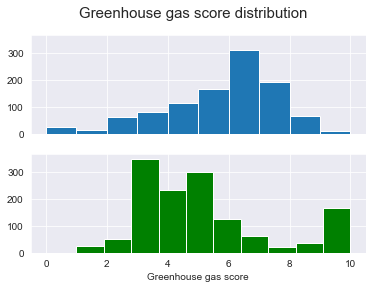

In [51]:
fig, axes = plt.subplots(2, sharex = True, sharey = True)
fig.suptitle('Greenhouse gas score distribution', size = 15)
axes[0].hist(df_08.greenhouse_gas_score)
axes[1].hist(df_18.greenhouse_gas_score,facecolor = 'green');
axes[1].set(xlabel = 'Greenhouse gas score');

**How has the distribution of combined mpg (```cmb_mpg```) changed from 2008 to 2018?**

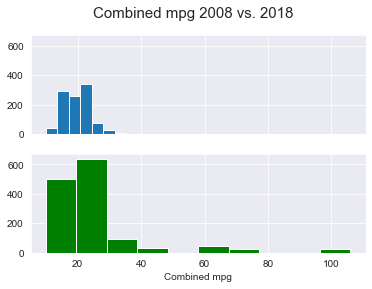

In [52]:
fig, axes = plt.subplots(2, sharex = True, sharey = True)
fig.suptitle('Combined mpg 2008 vs. 2018', size = 15)
axes[0].hist(df_08.cmb_mpg)
axes[1].hist(df_18.cmb_mpg, facecolor = 'green')
axes[1].set(xlabel = 'Combined mpg');

**Describe the correlation between displacement (```displ```) and combined mpg(```cmb_mpg```).**

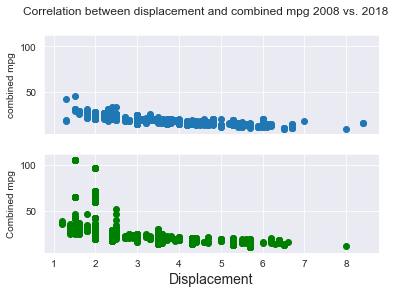

In [53]:
fig, (y08,y18) = plt.subplots(2, sharex = True, sharey = True)
y08.scatter(df_08.displ,df_08.cmb_mpg)
y18.scatter(df_18.displ,df_18.cmb_mpg, facecolor = 'green')
fig.suptitle('Correlation between displacement and combined mpg 2008 vs. 2018');
y08.set(ylabel = 'combined mpg')
plt.xlabel('Displacement', size = 14)
y18.set(ylabel = 'Combined mpg');

**Describe the correlation between greenhouse gas score and combined mpg.**

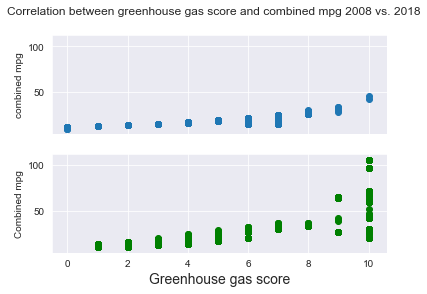

In [54]:
fig, (y08,y18) = plt.subplots(2, sharex = True, sharey = True)
y08.scatter(df_08.greenhouse_gas_score,df_08.cmb_mpg)
y18.scatter(df_18.greenhouse_gas_score,df_18.cmb_mpg, facecolor = 'green')
fig.suptitle('Correlation between greenhouse gas score and combined mpg 2008 vs. 2018');
y08.set(ylabel = 'combined mpg')
plt.xlabel('Greenhouse gas score', size = 14)
y18.set(ylabel = 'Combined mpg');

## Conclusions & Visuals

**Are more unique models using alternative fuels in 2018 compared to 2008? By how much?**

In [55]:
df_08.fuel.unique(), df_18.fuel.unique()

(array(['Gasoline', 'Cng', 'Ethanol', 'Gas'], dtype=object),
 array(['Gasoline', 'Diesel', 'Ethanol', 'Electricity', 'Gas'],
       dtype=object))

In [56]:
unique_models_alt_fuel_08 = df_08.query('fuel in ["Ethanol","Cng"]').model.nunique()

In [57]:
unique_models_alt_fuel_18 = df_18.query('fuel in ["Ethanol","Electricity"]').model.nunique()

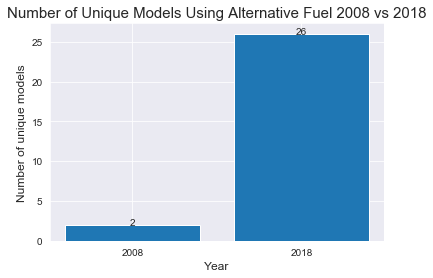

In [58]:
x_locations = [1,2]
years = ['2008', '2018']
model_counts = [unique_models_alt_fuel_08, unique_models_alt_fuel_18]
plt.bar(x_locations, model_counts,  )
plt.xlabel('Year', size = 12)
plt.ylabel('Number of unique models', size = 12)
plt.xticks(x_locations, years)
plt.title('Number of Unique Models Using Alternative Fuel 2008 vs 2018', size = 15)
for i in range(len(x_locations)):
    plt.text(x_locations[i],model_counts[i], s = str(model_counts[i]), horizontalalignment = 'center');

**How has the number of unique models using each alternative fuel changed from 2008 to 2018?**

In [59]:
alternative_fuel = ["Ethanol","Cng","Electricity"]
count_unique_model_per_fuel_type08 = df_08.query('fuel in {}'.format(alternative_fuel)).groupby('fuel').model.nunique()
count_unique_model_per_fuel_type18 = df_18.query('fuel in {}'.format(alternative_fuel)).groupby('fuel').model.nunique()

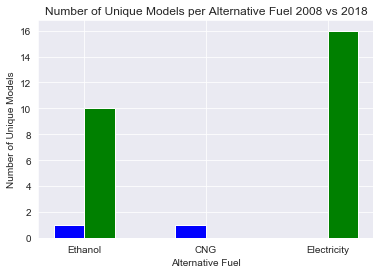

In [110]:
x_location = np.arange(3)+1
bar_heights08 = count_unique_model_per_fuel_type08
bar_heights08['Electricity'] = 0
bar_heights18 = count_unique_model_per_fuel_type18
bar_heights18['Cng'] = 0
barwidth = 0.25
xticks_labels = ["Ethanol","CNG","Electricity"]
plt.bar(x_location,bar_heights08, width = barwidth, label = '2008', color = 'blue')
plt.bar([x_location[0]+barwidth,x_location[2]+barwidth,x_location[1]+barwidth],bar_heights18, width = barwidth, label = '2018', color = 'green')
plt.xticks(x_location+barwidth/2, xticks_labels)
plt.title("Number of Unique Models per Alternative Fuel 2008 vs 2018")
plt.xlabel('Alternative Fuel')
plt.ylabel('Number of Unique Models');

**How much have vehicle classes improved in fuel economy (increased in mpg)?**

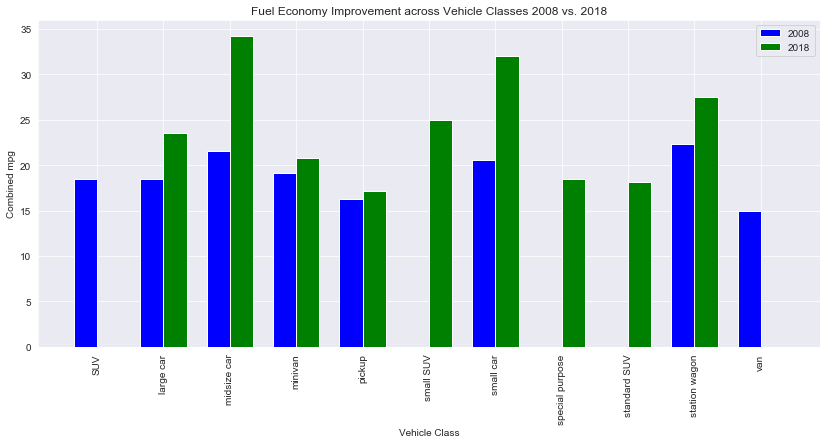

In [201]:
avg_cmb_mpg_per_vehclass08 = df_08.groupby('veh_class').cmb_mpg.mean()
avg_cmb_mpg_per_vehclass18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_class08 = set(df_08.veh_class.unique())
veh_class18 = set(df_18.veh_class.unique())
veh_class_list = list(veh_class08 | veh_class18)
veh_class_list.sort()

plt.figure(figsize = (14,6))

x_locations = np.arange(len(veh_class_list))
bar_width = 0.35
bar_heights08 = pd.Series(data = [], dtype = float)
bar_heights18 = pd.Series(data = [], dtype = float)
for vc in veh_class_list:
    if vc in veh_class08:
        bar_heights08[vc] = avg_cmb_mpg_per_vehclass08[vc]
    else:
        bar_heights08[vc] = 0.
for vc in veh_class_list:
    if vc in veh_class18:
        bar_heights18[vc] = avg_cmb_mpg_per_vehclass18[vc]
    else:
        bar_heights18[vc] = 0.
plt.bar(x_locations, bar_heights08, width = bar_width, label = '2008', color = 'blue')
plt.bar(x_locations + bar_width , bar_heights18, width = bar_width, label = '2018', color = 'green')
plt.xticks(x_locations+bar_width/2, veh_class_list, rotation = '90')
plt.legend()
plt.xlabel('Vehicle Class')
plt.ylabel('Combined mpg');
plt.title('Fuel Economy Improvement across Vehicle Classes 2008 vs. 2018');


**What are the characteristics of SmartWay vehicles? Have they changed over time? (mpg, greenhouse gas)**

In [91]:
df_08.smartway.unique(), df_18.smartway.unique(), 

(array(['no', 'yes'], dtype=object),
 array(['No', 'Yes', 'Elite'], dtype=object))

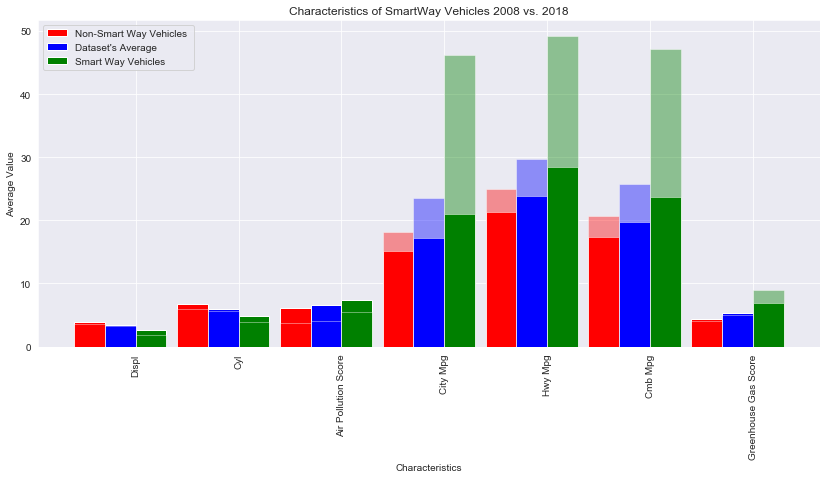

In [202]:
dataset_avg08 = df_08.mean()
smartway_avg08 = df_08.query('smartway =="yes"').mean().copy()
not_smartway_avg08 = df_08.query('smartway =="no"').mean().copy()

dataset_avg18 = df_18.mean()
smartway_avg18 = df_18.query('smartway in ["Yes","Elite"]').mean().copy()
not_smartway_avg18 = df_18.query('smartway =="No"').mean().copy()

plt.figure(figsize = (14,6))

x_loctions_1 = np.arange(len(dataset_avg08))
x_loctions_2 = np.arange(len(dataset_avg18))

bar_heights_dataset08 = dataset_avg08
bar_heights_smartway08 = smartway_avg08
bar_heights_not_smartway08 = not_smartway_avg08

bar_heights_dataset18 = dataset_avg18
bar_heights_smartway18 = smartway_avg18
bar_heights_not_smartway18 = not_smartway_avg18

bar_width = 0.30
xticks_labels = dataset_avg08.index.str.replace('_',' ').str.title()

plt.bar(x_loctions_1, bar_heights_not_smartway08, bar_width, label = 'Non-Smart Way Vehicles ', color = 'red') 
plt.bar(x_loctions_1+bar_width, bar_heights_dataset08, bar_width, label = "Dataset's Average", color = 'blue')
plt.bar(x_loctions_1+2*bar_width, bar_heights_smartway08, bar_width, label = 'Smart Way Vehicles' , color = 'green')

plt.bar(x_loctions_2, bar_heights_not_smartway18, bar_width,color = 'red', alpha = 0.4) 
plt.bar(x_loctions_2+bar_width, bar_heights_dataset18, bar_width, color = 'blue',alpha = 0.4)
plt.bar(x_loctions_2+2*bar_width, bar_heights_smartway18, bar_width,color = 'green', alpha = 0.4)

plt.xticks(x_loctions_1+1.5*bar_width,xticks_labels, rotation = '90')
plt.xlabel('Characteristics')
plt.ylabel('Average Value')
plt.legend()
plt.title('Characteristics of SmartWay Vehicles 2008 vs. 2018');